In [1]:
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch

_ = torch.manual_seed(1)

### Binary Classification

Hypothesis: $$ H(x) = sigmoid(Wx + b) = \sigma(Wx + b) $$
$$ sigmoid(x) = {{1} \over {1 + e^{-x}}} $$

Cost Function (Binary Cross Entropy): $$ Cost = - {1 \over N} \sum_{i=1}^{N} {(y_i * H(x_i) + (1 - y_i) * (1 - H(x_i)))} $$

Use different loss function from MSE because of **non-convex** problem.

In [2]:
# Set the train data
x_train = torch.FloatTensor([[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]])
y_train = torch.FloatTensor([[0], [0], [0], [1], [1], [1]])

# Initialize hypothesis function
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b], lr=1)
total_epochs = 1000

# Let's train
for epoch in np.arange(total_epochs + 1):

  H = F.sigmoid(x_train.matmul(W) + b)
  cost = -torch.mean(y_train * torch.log(H) + (1 - y_train) * torch.log(1 - H))

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, total_epochs, cost.item()))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [3]:
# Set the train data
x_train = torch.FloatTensor([[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]])
y_train = torch.FloatTensor([[0], [0], [0], [1], [1], [1]])


# Define model class
class BinaryClassifier(nn.Module):

  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.linear(x))

model = BinaryClassifier()
optimizer = optim.SGD(model.parameters(), lr=1)

total_epochs = 1000

# Let's train
for epoch in np.arange(total_epochs + 1):

  H = model(x_train)
  cost = F.binary_cross_entropy(H, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, total_epochs, cost.item()))

# Let's test
print("\nTest result for train data")
print((model(x_train) > 0.5).squeeze())

Epoch    0/1000 Cost: 0.539713
Epoch  100/1000 Cost: 0.134272
Epoch  200/1000 Cost: 0.080486
Epoch  300/1000 Cost: 0.057820
Epoch  400/1000 Cost: 0.045251
Epoch  500/1000 Cost: 0.037228
Epoch  600/1000 Cost: 0.031649
Epoch  700/1000 Cost: 0.027538
Epoch  800/1000 Cost: 0.024381
Epoch  900/1000 Cost: 0.021877
Epoch 1000/1000 Cost: 0.019843

Test result for train data
tensor([False, False, False,  True,  True,  True])


### Multi Classification

Hypothesis: $$ H(x) = softmax(Wx + b) = $$
$$ softmax(x) = {{e^{x_i}} \over \sum {{e^{x_i}}}} $$

Cost Function (Cross Entropy): $$ Cost = - {1 \over N} \sum_{i=1}^{N}  \sum_{j=1}^{k} {(yj^{(i)} * log(H(x_j^{(i)}))} $$

In [4]:
# Set the train data
x_train = torch.FloatTensor([[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]])
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])

# Initialize hypothesis function
W = torch.zeros((4,3), requires_grad=True)
b = torch.zeros((1,3), requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.1)
total_epochs = 1000

y_train_one_hot = F.one_hot(y_train)

# Let's train
for epoch in np.arange(total_epochs + 1):

  H = F.softmax(x_train.matmul(W) + b, dim=1)
  cost = - torch.mean((y_train_one_hot * torch.log(H)).sum(dim=1))

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, total_epochs, cost.item()))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.704199
Epoch  200/1000 Cost: 0.623000
Epoch  300/1000 Cost: 0.565717
Epoch  400/1000 Cost: 0.515291
Epoch  500/1000 Cost: 0.467662
Epoch  600/1000 Cost: 0.421278
Epoch  700/1000 Cost: 0.375402
Epoch  800/1000 Cost: 0.329766
Epoch  900/1000 Cost: 0.285073
Epoch 1000/1000 Cost: 0.248155


In [5]:
# Set the train data
x_train = torch.FloatTensor([[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]])
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])

# Define model class
class MultiClassifier(nn.Module):

  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(4,3)
    self.softmax = nn.Softmax(dim=1)

  def forward(self, x):
    return self.softmax(self.linear(x))

total_epochs = 1000
model = MultiClassifier()
optimizer = optim.SGD(model.parameters(), lr=0.1)


# Let's train
for epoch in np.arange(total_epochs + 1):

  y = model(x_train)
  cost = F.cross_entropy(y, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, total_epochs, cost.item()))

# Let's test
print("\nTest result for train data")
print((model(x_train) > 0.5).squeeze())

Epoch    0/1000 Cost: 1.145317
Epoch  100/1000 Cost: 0.973734
Epoch  200/1000 Cost: 0.934007
Epoch  300/1000 Cost: 0.912420
Epoch  400/1000 Cost: 0.898093
Epoch  500/1000 Cost: 0.887538
Epoch  600/1000 Cost: 0.879263
Epoch  700/1000 Cost: 0.872514
Epoch  800/1000 Cost: 0.866860
Epoch  900/1000 Cost: 0.862033
Epoch 1000/1000 Cost: 0.857853

Test result for train data
tensor([[False, False,  True],
        [False, False,  True],
        [False, False,  True],
        [False,  True, False],
        [False,  True, False],
        [False,  True, False],
        [False,  True, False],
        [False,  True, False]])


### Multi Classification (MNIST)

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
import numpy as np

USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")

if device == "cuda":
  _ = torch.cuda.manual_seed_all(777)

else:
  _ = torch.manual_seed(1)

print(device)

cuda


In [7]:
from torchvision import datasets
import torchvision.transforms as transforms


# Download MNIST Dataset
mnist_train = datasets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = datasets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 209459979.06it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 23326727.10it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 70473958.02it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 7862372.58it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



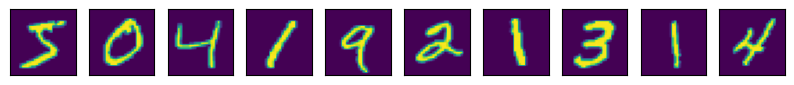

In [8]:
# See the sample raw data
import matplotlib.pyplot as plt

sample_mnist = mnist_train.data[0:10].numpy()

fig, ax = plt.subplots(1, len(sample_mnist), figsize=(10, 1))
for idx, sample in enumerate(sample_mnist):
  ax[idx].imshow(sample_mnist[idx])
  ax[idx].get_xaxis().set_visible(False)
  ax[idx].get_yaxis().set_visible(False)

In [34]:
# Put it in DataLoader
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.dataset import TensorDataset

dataloader = DataLoader(mnist_train, batch_size=128, shuffle=True, drop_last=True) # Normalized itself

In [39]:
# Define model class
class MnistMultiClassifier(nn.Module):

  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(28 * 28, 10)

  def forward(self, x):
    return self.linear(x)

model = (MnistMultiClassifier()).to(device)

total_epochs = 15
optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.CrossEntropyLoss().to(device)

# Let's train
for epoch in np.arange(total_epochs + 1):

  avg_cost = 0
  total_batch = len(dataloader)

  for batch_idx, sample in enumerate(dataloader):

    x_batch, y_batch = sample
    x_batch, y_batch = (x_batch.view(-1, 28 * 28)).to(device), y_batch.to(device)

    y_pred = model(x_batch)

    cost = criterion(y_pred, y_batch)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print (f"Epoch {epoch:4d}/{total_epochs} Cost: {avg_cost.item():.6f}")

Epoch    0/15 Cost: 0.573950
Epoch    1/15 Cost: 0.373966
Epoch    2/15 Cost: 0.341921
Epoch    3/15 Cost: 0.325968
Epoch    4/15 Cost: 0.315226
Epoch    5/15 Cost: 0.307865
Epoch    6/15 Cost: 0.301789
Epoch    7/15 Cost: 0.297312
Epoch    8/15 Cost: 0.293644
Epoch    9/15 Cost: 0.290294
Epoch   10/15 Cost: 0.287443
Epoch   11/15 Cost: 0.285127
Epoch   12/15 Cost: 0.283032
Epoch   13/15 Cost: 0.280968
Epoch   14/15 Cost: 0.279479
Epoch   15/15 Cost: 0.277754


Accuracy : 92.35% 




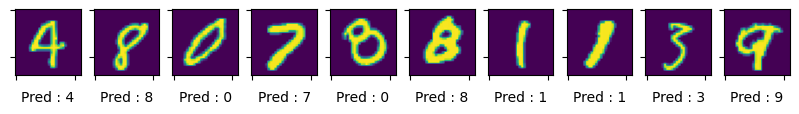

In [64]:
# Let's predict
test_dataloader = DataLoader(mnist_test, batch_size=128, shuffle=True, drop_last=True)

with torch.no_grad():

  total_sample, accuracy = 0, 0

  for test_idx, sample in enumerate(test_dataloader):

    x_test, y_test = sample
    x_test, y_test = (x_test.view(-1, 28 * 28)).to(device), y_test.to(device)

    y_pred = model(x_test).argmax(dim=1)

    total_sample += len(y_test)
    accuracy += (y_pred == y_test).count_nonzero()


    if test_idx == 0:
      fig, ax = plt.subplots(1, 10, figsize=(10, 1))
      for img_idx, x in enumerate(x_test[:10]):

        ax[img_idx].imshow(x.view(28, 28).cpu().numpy())
        ax[img_idx].set_xticklabels([])
        ax[img_idx].set_yticklabels([])
        ax[img_idx].set_xlabel(f"Pred : {y_pred[img_idx]}")

  print(f"Accuracy : {(accuracy / total_sample) * 100:.2f}% \n\n")